In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('indicators.csv')

# Calculate the lower and upper bounds for outlier detection using IQR
def detect_outliers(data_column):
    Q1 = data_column.quantile(0.25)
    Q3 = data_column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

# Check for outliers in each financial data column
financial_data_columns = ['ROC_2', 'ROC_4', 'ROC_8', 'ROC_16', 'ROC_32', 'ROC_64',
                          'ADX_2', 'ADX_4', 'ADX_8', 'ADX_16', 'ADX_32', 'ADX_64',
                          'RSI_2', 'RSI_4', 'RSI_8', 'RSI_16', 'RSI_32', 'RSI_64',
                          'ATR_2', 'ATR_4', 'ATR_8', 'ATR_16', 'ATR_32', 'ATR_64']

outliers = {}
for col in financial_data_columns:
    lower_bound, upper_bound = detect_outliers(data[col])
    outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
    outliers[col] = data[outlier_mask]

# Plot boxplots to visualize the outliers
plt.figure(figsize=(15, 10))
plt.boxplot(data[financial_data_columns], vert=False, labels=financial_data_columns)
plt.title('Boxplot - Outliers Detection for Financial Data')
plt.xlabel('Value')
plt.ylabel('Columns')
plt.show()

# Plot scatter plots to visualize the outliers
plt.figure(figsize=(15, 30))
for i, col in enumerate(financial_data_columns):
    plt.subplot(6, 4, i + 1)
    plt.scatter(data[col], data['date'], c='b', label='Inliers')
    if col in outliers:
        plt.scatter(outliers[col][col], outliers[col]['date'], c='r', label='Outliers')
    plt.xlabel(col)
    plt.ylabel('Date')
    plt.legend()
plt.tight_layout()
plt.show()


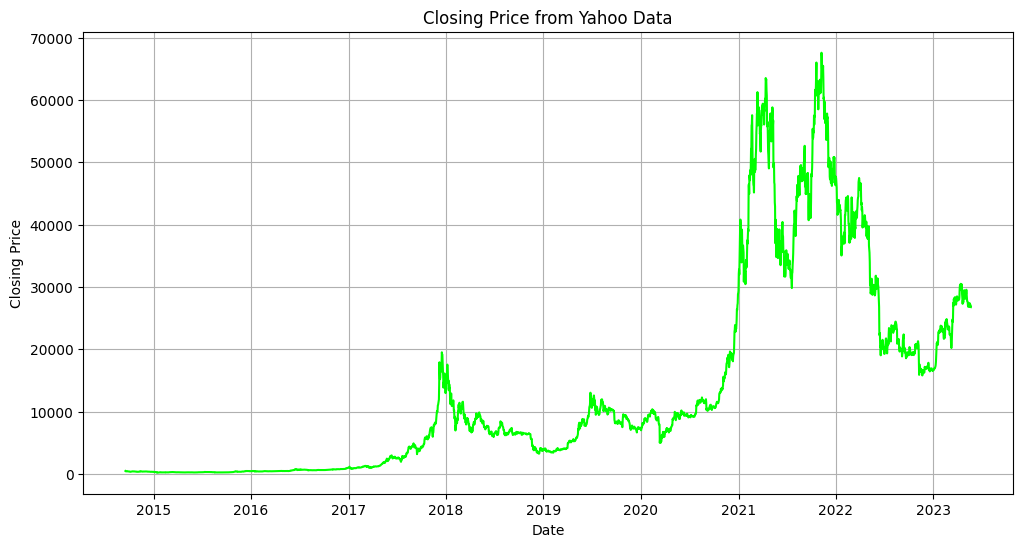

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'Yahoo_Fin_BTC-USD_2014-09-17_2023-05-22.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Assuming the column name for the closing price is 'Close'
close_column = df['Close']

# Plotting the Closing price with a specific color (e.g., blue) and markers (dots)
plt.figure(figsize=(12, 6))
plt.plot(df.index, close_column, color='lime')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price from Yahoo Data')
plt.grid(True)
plt.show()


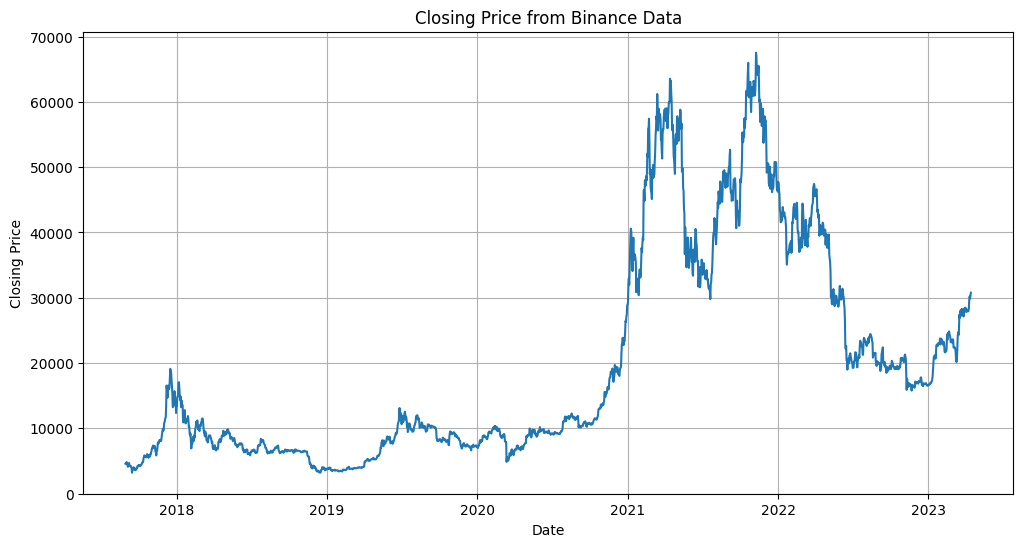

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'binance.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Convert 'Close' column to numeric values
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Assuming the column name for the closing price is 'Close'
close_column = df['close']

# Plotting the Closing price
plt.figure(figsize=(12, 6))
plt.plot(df.index, close_column)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price from Binance Data')
plt.grid(True)
plt.show()


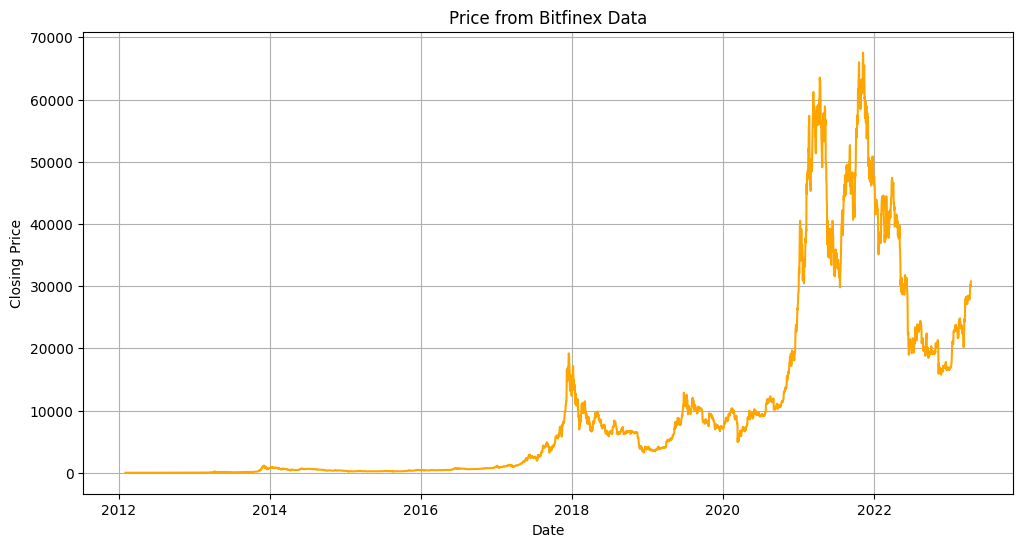

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'Bitfinex_BTC-USD_2012-02-02_2023-04-14.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)

# Convert 'Price' column to numeric values
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Assuming the column name for the price data is 'Price'
price_column = df['Price']

# Plotting the price data
plt.figure(figsize=(12, 6))
plt.plot(df.index, price_column, color='orange')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price from Bitfinex Data')
plt.grid(True)
plt.show()


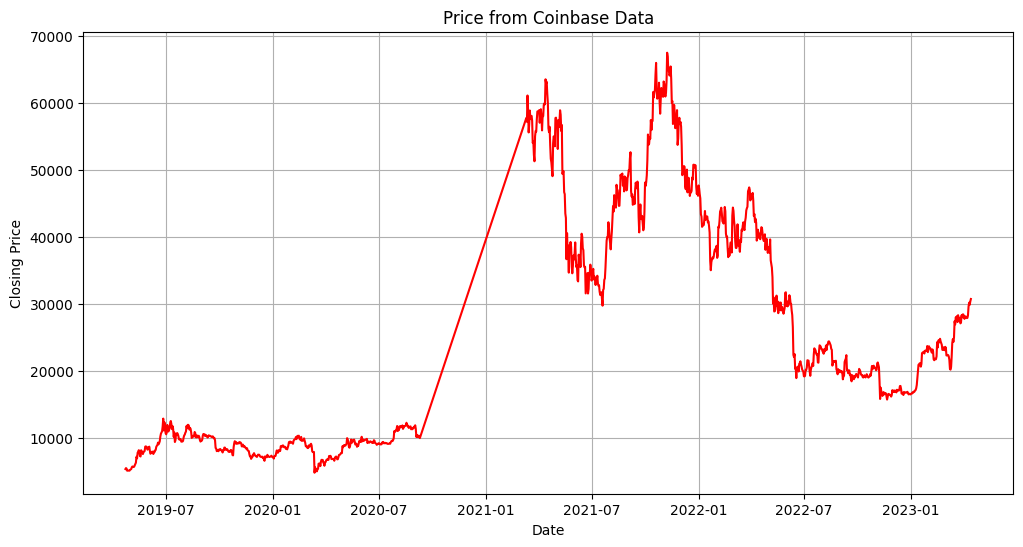

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'Coinbase_Pro_BTC-USD_2019-04-22_2023-04-14.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df.set_index('Date', inplace=True)

# Remove commas from the 'Price' column and convert it to numeric values
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Assuming the column name for the price data is 'Price'
price_column = df['Price']

# Plotting the price data
plt.figure(figsize=(12, 6))
plt.plot(df.index, price_column, color='red')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Price from Coinbase Data')
plt.grid(True)
plt.show()

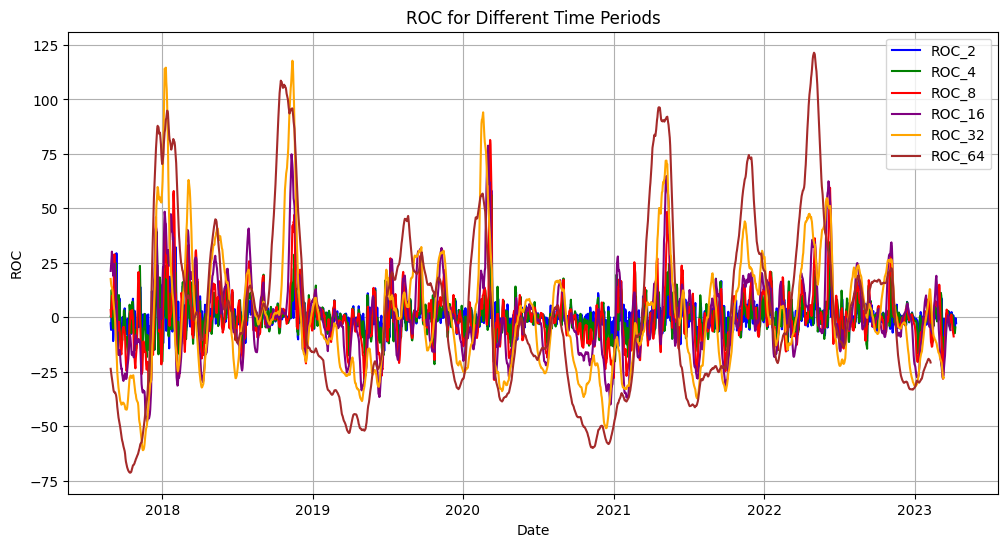

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plotting the Date (x-axis) and ROC values (y-axis)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ROC_2'], label='ROC_2', color='blue')
plt.plot(df.index, df['ROC_4'], label='ROC_4', color='green')
plt.plot(df.index, df['ROC_8'], label='ROC_8', color='red')
plt.plot(df.index, df['ROC_16'], label='ROC_16', color='purple')
plt.plot(df.index, df['ROC_32'], label='ROC_32', color='orange')
plt.plot(df.index, df['ROC_64'], label='ROC_64', color='brown')

plt.xlabel('Date')
plt.ylabel('ROC')
plt.title('ROC for Different Time Periods')
plt.grid(True)
plt.legend()
plt.show()


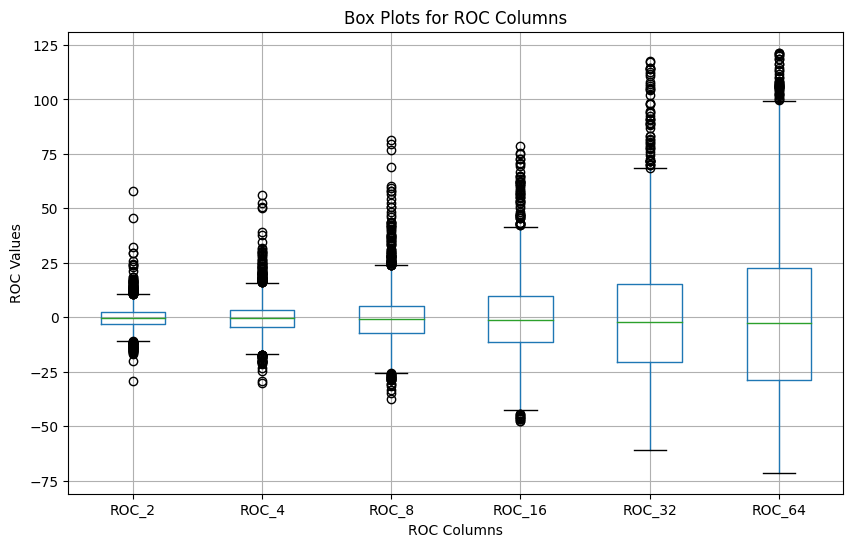

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Plotting box plots for each ROC column
plt.figure(figsize=(10, 6))
df.boxplot(column=['ROC_2', 'ROC_4', 'ROC_8', 'ROC_16', 'ROC_32', 'ROC_64'])

plt.xlabel('ROC Columns')
plt.ylabel('ROC Values')
plt.title('Box Plots for ROC Columns')
plt.grid(True)
plt.show()


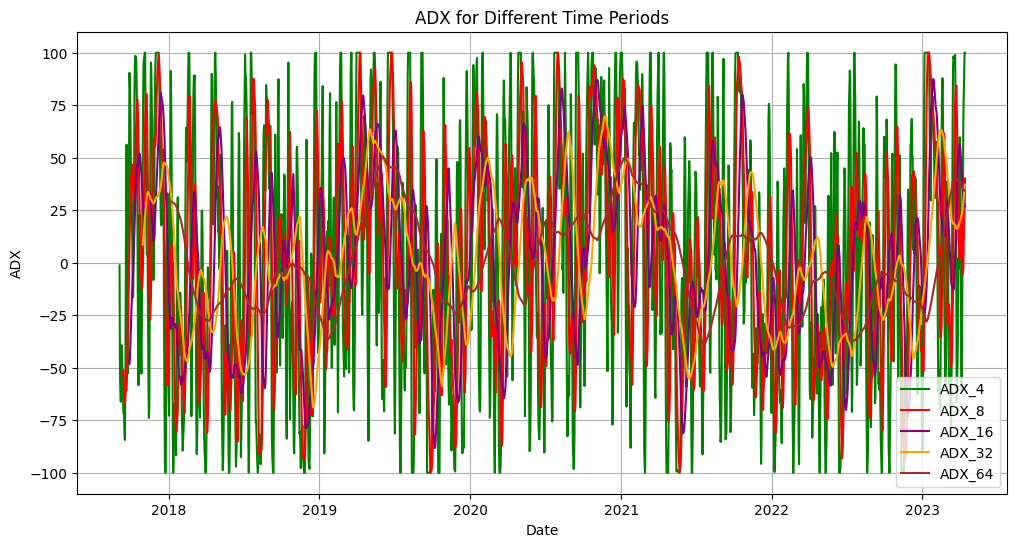

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plotting the Date (x-axis) and ROC values (y-axis)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ADX_2'], label='ADX_2', color='blue')
plt.plot(df.index, df['ADX_4'], label='ADX_4', color='green')
plt.plot(df.index, df['ADX_8'], label='ADX_8', color='red')
plt.plot(df.index, df['ADX_16'], label='ADX_16', color='purple')
plt.plot(df.index, df['ADX_32'], label='ADX_32', color='orange')
plt.plot(df.index, df['ADX_64'], label='ADX_64', color='brown')

plt.xlabel('Date')
plt.ylabel('ADX')
plt.title('ADX for Different Time Periods')
plt.grid(True)
plt.legend()

plt.show()




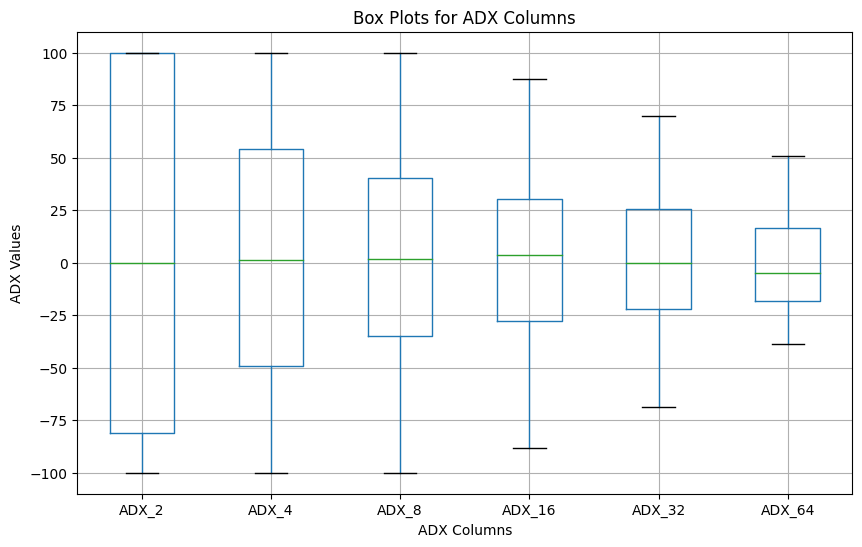

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Plotting box plots for each ADX column
plt.figure(figsize=(10, 6))
df.boxplot(column=['ADX_2', 'ADX_4', 'ADX_8', 'ADX_16', 'ADX_32', 'ADX_64'])

plt.xlabel('ADX Columns')
plt.ylabel('ADX Values')
plt.title('Box Plots for ADX Columns')
plt.grid(True)
plt.show()


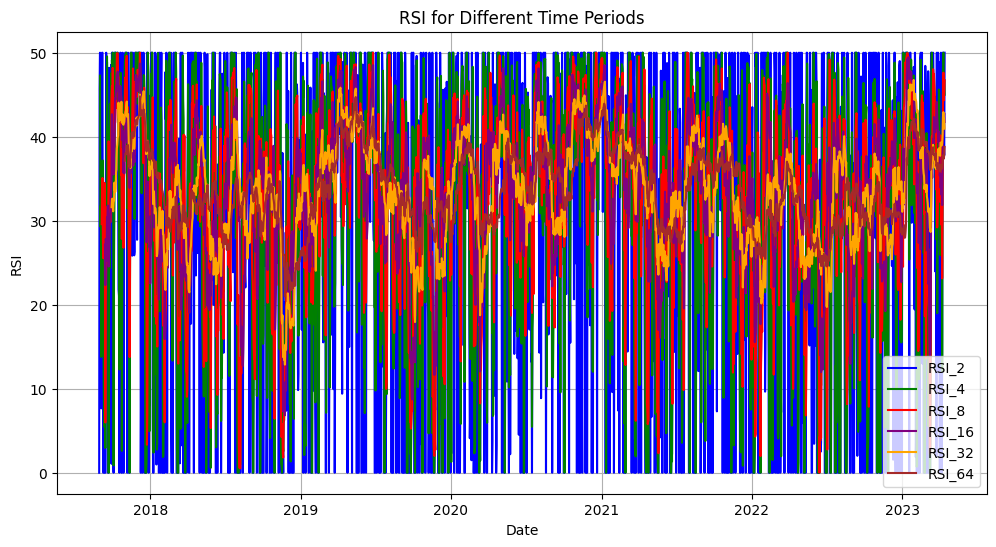

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plotting the Date (x-axis) and ROC values (y-axis)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI_2'], label='RSI_2', color='blue')
plt.plot(df.index, df['RSI_4'], label='RSI_4', color='green')
plt.plot(df.index, df['RSI_8'], label='RSI_8', color='red')
plt.plot(df.index, df['RSI_16'], label='RSI_16', color='purple')
plt.plot(df.index, df['RSI_32'], label='RSI_32', color='orange')
plt.plot(df.index, df['RSI_64'], label='RSI_64', color='brown')

plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('RSI for Different Time Periods')
plt.grid(True)
plt.legend()

plt.show()




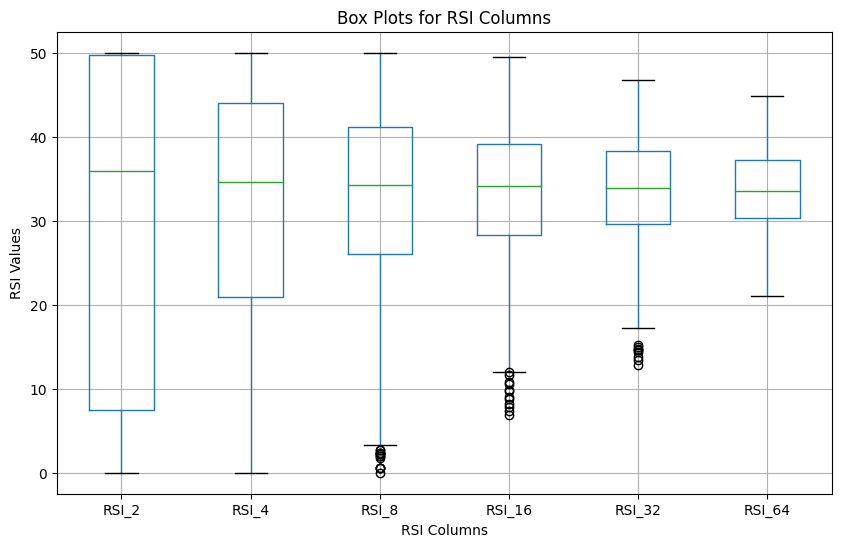

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Plotting box plots for each ADX column
plt.figure(figsize=(10, 6))
df.boxplot(column=['RSI_2', 'RSI_4', 'RSI_8', 'RSI_16', 'RSI_32', 'RSI_64'])

plt.xlabel('RSI Columns')
plt.ylabel('RSI Values')
plt.title('Box Plots for RSI Columns')
plt.grid(True)
plt.show()


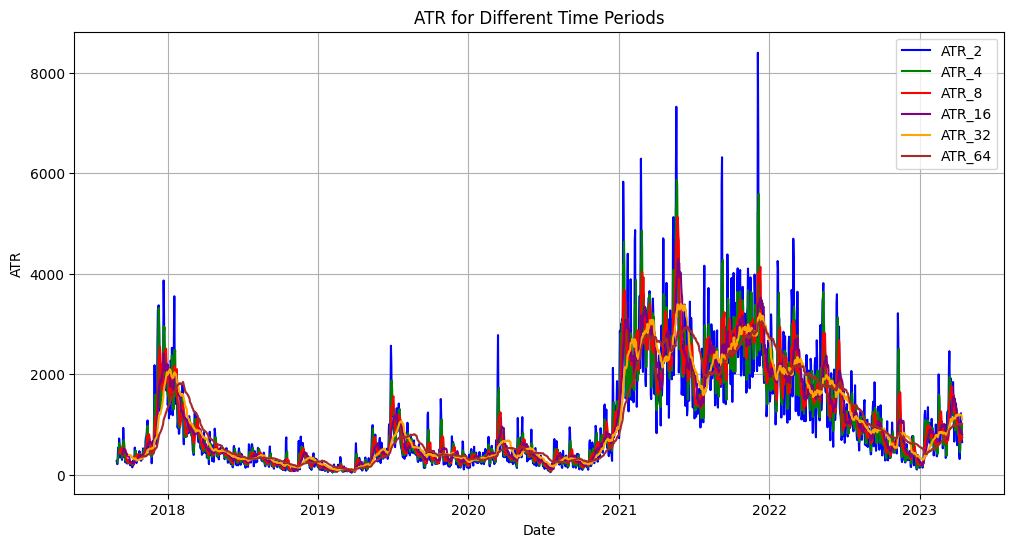

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format and set it as the DataFrame index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plotting the Date (x-axis) and ROC values (y-axis)
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ATR_2'], label='ATR_2', color='blue')
plt.plot(df.index, df['ATR_4'], label='ATR_4', color='green')
plt.plot(df.index, df['ATR_8'], label='ATR_8', color='red')
plt.plot(df.index, df['ATR_16'], label='ATR_16', color='purple')
plt.plot(df.index, df['ATR_32'], label='ATR_32', color='orange')
plt.plot(df.index, df['ATR_64'], label='ATR_64', color='brown')

plt.xlabel('Date')
plt.ylabel('ATR')
plt.title('ATR for Different Time Periods')
plt.grid(True)
plt.legend()

plt.show()




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'path/to/finance_data.csv' with the actual path to your CSV file
file_path = 'indicators.csv'
df = pd.read_csv(file_path)

# Plotting box plots for each ADX column
plt.figure(figsize=(10, 6))
df.boxplot(column=['ATR_2', 'ATR_4', 'ATR_8', 'ATR_16', 'ATR_32', 'ATR_64'])

plt.xlabel('ATR Columns')
plt.ylabel('ATR Values')
plt.title('Box Plots for ATR Columns')
plt.grid(True)
plt.show()
